In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
cd "C:/Users/anshu/Desktop/kaggle/tesla stock price prediction"

C:\Users\anshu\Desktop\kaggle\tesla stock price prediction


In [9]:
df = pd.read_csv("TSLA.csv")

In [10]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
Date         2416 non-null object
Open         2416 non-null float64
High         2416 non-null float64
Low          2416 non-null float64
Close        2416 non-null float64
Adj Close    2416 non-null float64
Volume       2416 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [20]:
x = df[['High', 'Low', 'Open','Volume']].values
y = df['Close'].values

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [25]:
#dividing in train and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [26]:
reg = LinearRegression()

In [27]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
print(reg.coef_)

[ 8.44926735e-01  7.95604390e-01 -6.40878154e-01  8.50437894e-09]


In [29]:
    predicts = reg.predict(x_test)

In [30]:
new = pd.DataFrame({ 'Actual' : y_test.flatten(), 'Predicted' : predicts.flatten()})

In [31]:
new.head(30)

,Actual,Predicted
0,29.940001,29.820981
1,235.839996,235.198016
2,362.750000,364.750965
3,24.740000,24.958968
4,250.029999,247.639248
5,334.850006,336.918477
6,222.600006,221.993347
7,203.759995,204.866172
8,209.600006,211.643778
9,294.790009,295.205807


In [34]:
from sklearn import metrics
import math
print(" MSE: ", metrics.mean_absolute_error(y_test,predicts))
print(" RMSE: ", math.sqrt(metrics.mean_absolute_error(y_test,predicts)))

 MSE:  1.4127118739552649
 RMSE:  1.1885755651010435


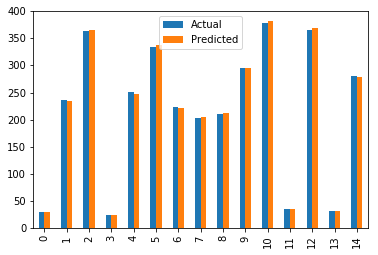

In [35]:
#try to plot the new dataframe
graph = new.head(15)
graph.plot(kind = 'bar')